In [96]:
import tensorflow
import os,sys

The Frechet Inception Distance score, or FID for short, is a metric that calculates the distance between feature vectors calculated for real and generated images.

The score summarizes how similar the two groups are in terms of statistics on computer vision features of the raw images calculated using the inception v3 model used for image classification. Lower scores indicate the two groups of images are more similar, or have more similar statistics, with a perfect score being 0.0 indicating that the two groups of images are identical.

The FID score is used to evaluate the quality of images generated by generative adversarial networks, and lower scores have been shown to correlate well with higher quality images.

# Calculating the quality of images generated from DCGAN using the frechet inception distance on Animo image dataset

In [124]:
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import shuffle
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.datasets.mnist import load_data
from skimage.transform import resize

In [125]:
# scale an array of images to a new size
def scale_images(images, new_shape):
	images_list = list()
	for image in images:
		# resize with nearest neighbor interpolation
		new_image = resize(image, new_shape, 0)
		# store
		images_list.append(new_image)
	return asarray(images_list)

In [126]:
# calculate frechet inception distance
def calculate_fid(model, images1, images2):
	# calculate activations
	act1 = model.predict(images1)
	act2 = model.predict(images2)
	# calculate mean and covariance statistics
	mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
	mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
	# calculate sum squared difference between means
	ssdiff = numpy.sum((mu1 - mu2)**2.0)
	# calculate sqrt of product between cov
	covmean = sqrtm(sigma1.dot(sigma2))
	# check and correct imaginary numbers from sqrt
	if iscomplexobj(covmean):
		covmean = covmean.real
	# calculate score
	fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
	return fid

In [106]:
# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))

In [107]:
# original images
data = np.load("/content/sample_data/animo_file_10000.npz")
data = data['a']
data = np.array(data)
X = data.astype('float32')
# scale from [0,255] to [-1,1]
X = (X - 127.5) / 127.5
print(X.shape)

(10000, 64, 64, 3)


In [108]:
import matplotlib.pyplot as plt
def save_plot(x_input,n=4):
    x_input = (x_input + 1) / 2.0
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.imshow(x_input[i,:,:,:])
        plt.axis('off')
    plt.show()
# plot data
# save_plot(k[:16])

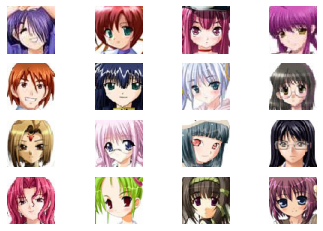

In [118]:
# original images
save_plot(X)

In [110]:
# load generator model
loaded_model = tensorflow.keras.models.load_model("/content/sample_data/generator_model.h5")

In [111]:
from numpy import *
from numpy.random import *

# generated images
latent_dim = 512
n_samples = 1000
x_input = randn(latent_dim * n_samples)
# print(x_input.shape)
z_input = x_input.reshape(n_samples, latent_dim)
# print(z_input.shape)
pred = loaded_model.predict(z_input)

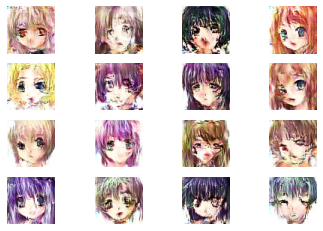

In [119]:
# Generated images
save_plot(pred,n=4)

In [120]:
# we are calculating for 500 images
images1 = X[:1000]
images2 = pred[:1000]

In [121]:
print(images1.shape,images2.shape)

(1000, 64, 64, 3) (1000, 64, 64, 3)


In [122]:
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')

In [127]:
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)

Scaled (1000, 299, 299, 3) (1000, 299, 299, 3)


In [128]:
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)

In [129]:
# calculate fid
fid = calculate_fid(model, images1, images2)
print('FID: %.3f' % fid)

FID: 8.120


As we can see that FID score between the original and generated datasets is about eight. so, we can say that its both are data set much identical.

                                              -: END :-